In [1]:
%matplotlib inline
import pandas as pd
data = pd.read_excel("ActualRatings_weeklyGRP.xls", sheet_name='TVRating_Data', index_col=0)
data.head()

,GRP
GRPRatingsDate,
17-Jun-2007 (25),243.60
24-Jun-2007 (26),263.19
01-Jul-2007 (27),269.89
08-Jul-2007 (28),252.88
15-Jul-2007 (29),303.46


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
data.index = data.index.str[:11]

In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
import plotly

In [6]:
plotly.tools.set_credentials_file(username='81santi81', api_key='YrIPfoUSq1ESCQ99NVNh')

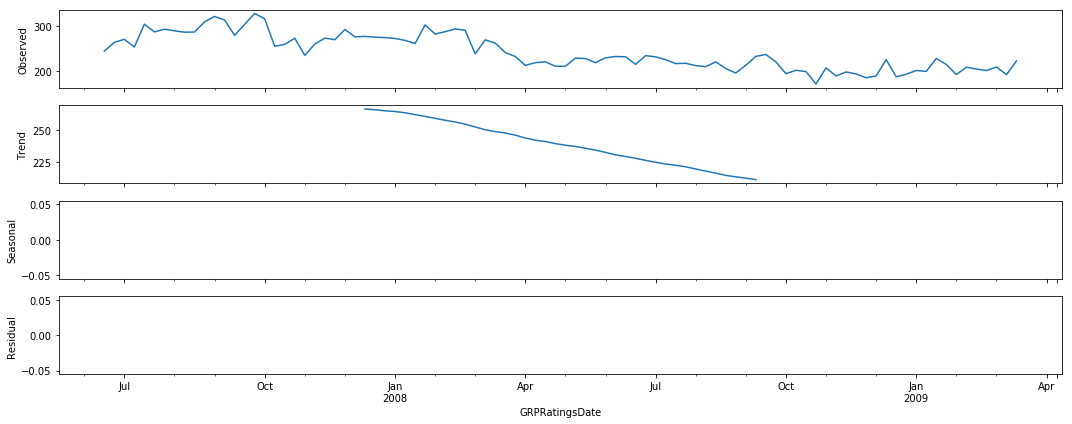

In [7]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()

In [8]:
data.head()

,GRP
GRPRatingsDate,
2007-06-17,243.60
2007-06-24,263.19
2007-07-01,269.89
2007-07-08,252.88
2007-07-15,303.46


In [9]:
ts = data['GRP'] 
ts.head(10)

GRPRatingsDate
2007-06-17    243.60
2007-06-24    263.19
2007-07-01    269.89
2007-07-08    252.88
2007-07-15    303.46
2007-07-22    286.29
2007-07-29    292.28
2007-08-05    288.72
2007-08-12    285.70
2007-08-19    286.01
Name: GRP, dtype: float64

In [10]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2007,6,17)]

243.6

In [11]:
#2. Use ':' if one of the indices is at ends:
training = ts[:'2008-10-26']

In [12]:
test = ts['2008-11-02':]

In [13]:
test.size

20

In [14]:
training.size

72

In [15]:
import plotly.plotly as ply
import cufflinks as cf
training.iplot(title="TRP Ratings Jul 2007 to Sep 2008")

In [16]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [18]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [19]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 

# seasonal difference
X = training.values


In [135]:
interval = 3
differenced = difference(X, interval)
# fit model
model = ARIMA(differenced, order=(3,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   69
Model:                     ARMA(3, 1)   Log Likelihood                -303.624
Method:                       css-mle   S.D. of innovations             19.604
Date:                Sun, 16 Sep 2018   AIC                            619.249
Time:                        22:37:08   BIC                            632.653
Sample:                             0   HQIC                           624.567
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0536      3.377     -0.904      0.369      -9.673       3.566
ar.L1.y       -0.1274      0.189     -0.673      0.503      -0.498       0.243
ar.L2.y        0.3081      0.124      2.478      0.0

In [136]:

# one-step out-of sample forecast
forecast = model_fit.forecast(steps=20)[0]

In [137]:
forecast = inverse_difference(X, forecast, interval)
forecast

array([191.72035412, 199.47798072, 203.22222   , 200.31747559,
       199.07680789, 197.00556126, 197.92229191, 197.60939696,
       198.66983507, 198.11163097, 198.62100619, 198.00621459,
       198.44041775, 198.01414173, 198.42132872, 198.08337012,
       198.40380158, 198.11373707, 198.369862  , 198.13366416])

In [138]:
mean_absolute_percentage_error(test.values,forecast)

5.270078188041076